In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
Mov = pd.read_csv("D:/Nueva carpeta - copia (2)/Udemy/Python Udemy/Data Files/4. ST Academy - SVM resource files/Movie_classification.csv", header = 0)
Mov.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [43]:
Mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [44]:
Mov["Time_taken"].fillna(value = Mov["Time_taken"].mean(), inplace = True)
Mov.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [45]:
Mov = pd.get_dummies(Mov,columns=["3D_available", "Genre"], drop_first = True)
Mov.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


In [46]:
x = Mov.loc[:, Mov.columns != "Start_Tech_Oscar"]
print(x.shape)
x.head()

(506, 20)


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


In [47]:
y = Mov["Start_Tech_Oscar"]
print(y.shape)
y.head()

(506,)


0    1
1    0
2    1
3    1
4    1
Name: Start_Tech_Oscar, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.2, random_state = 0)

In [49]:
print("xtrain: ", x_train.shape, "xtest:", x_test.shape)
x_train.head()

xtrain:  (404, 20) xtest: (102, 20)


,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
220,27.1618,67.40,0.493,38612.805,162.0,8.485,8.640,8.485,8.670,8.52,480270,174.68,224.272,23,536,53400,0,0,0,1
71,23.1752,76.62,0.587,33113.355,91.0,7.280,7.400,7.290,7.455,8.16,491978,200.68,263.472,46,400,43400,0,0,0,0
240,22.2658,64.86,0.572,38312.835,127.8,6.755,6.935,6.800,6.840,8.68,470107,204.80,224.320,24,387,54000,1,1,0,0
6,21.7658,70.74,0.476,33396.660,140.1,7.065,7.265,7.150,7.400,8.96,459241,139.16,243.664,41,522,45800,1,0,0,1
417,538.8120,91.20,0.321,29463.720,162.6,9.135,9.305,9.095,9.165,6.96,302776,172.16,301.664,60,589,20800,1,0,0,0


Training Calssification Tree

In [50]:
from sklearn import tree
clftree = tree.DecisionTreeClassifier(max_depth = 3)
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

Predict Values

In [51]:
y_trainpred = clftree.predict(x_train)
y_testpred = clftree.predict(x_test)
y_testpred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

Performance

In [52]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import accuracy_score as asc
cm(y_train, y_trainpred)

array([[172,  14],
       [126,  92]], dtype=int64)

In [53]:
cm(y_test, y_testpred)

array([[39,  5],
       [41, 17]], dtype=int64)

In [54]:
asc(y_test, y_testpred)

0.5490196078431373

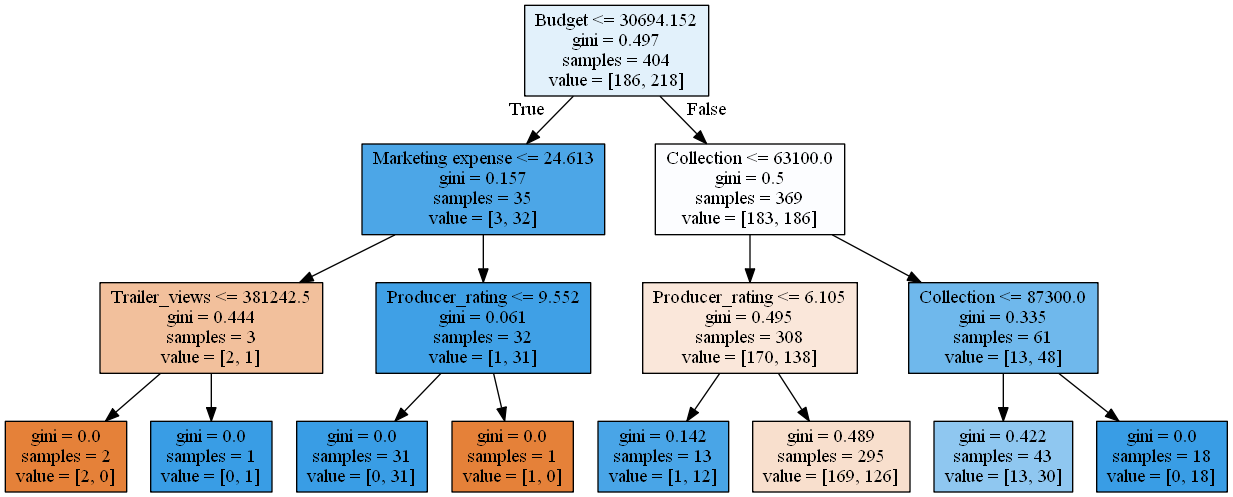

In [55]:
dot_data = tree.export_graphviz(clftree, out_file=None, feature_names = x_train.columns, filled = True)
from IPython.display import Image
import pydotplus
import graphviz
gr = pydotplus.graph_from_dot_data(dot_data)
Image(gr.create_png())

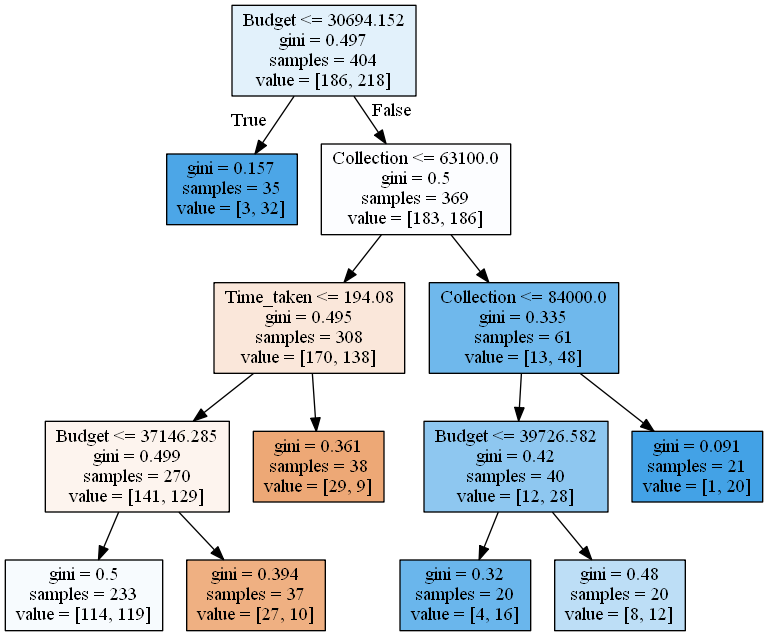

In [56]:
clftree2 = tree.DecisionTreeClassifier(min_samples_leaf = 20, max_depth = 4)
clftree2.fit(x_train, y_train)
data = tree.export_graphviz(clftree2, out_file=None, feature_names = x_train.columns, filled = True)
gre2 = pydotplus.graph_from_dot_data(data)
Image(gre2.create_png())

In [57]:
asc(y_test, clftree2.predict(x_test))

0.5588235294117647

Bagging

In [60]:
from sklearn.ensemble import BaggingClassifier as BG
clftree3 = tree.DecisionTreeClassifier()
bagclf = BG(base_estimator = clftree3, n_estimators = 1000, bootstrap = True, n_jobs = -1, random_state = 42)
bagclf.fit(x_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [61]:
cm(y_test, bagclf.predict(x_test))

array([[27, 17],
       [22, 36]], dtype=int64)

In [63]:
asc(y_test, bagclf.predict(x_test))

0.6176470588235294

Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier as RF
rfclf = RF(n_estimators = 1000, n_jobs =-1, random_state = 42)
rfclf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [66]:
cm(y_test, rfclf.predict(x_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [67]:
asc(y_test, rfclf.predict(x_test))

0.6372549019607843

GridSearch

In [68]:
from sklearn.model_selection import GridSearchCV as GS

In [69]:
rfclf2 = RF(n_estimators = 250, random_state = 42)
paramgrid = {"max_features": [4,5,6,7,8,9,10],
            "min_samples_split": [2, 3, 10], }

In [71]:
gridS = GS(rfclf2, paramgrid, n_jobs= -1, cv = 5, scoring="accuracy")
gridS.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [73]:
gridS.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [75]:
cvrfclf = gridS.best_estimator_
asc(y_test, cvrfclf.predict(x_test))

0.6274509803921569

In [76]:
cm(y_test, cvrfclf.predict(x_test))

array([[25, 19],
       [19, 39]], dtype=int64)